In [10]:
# import libaries
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [11]:
# setup debug for prints troubleshooting
debug = True

In [12]:
# Load in C50train located ../C50train/
train_dir = '../C50train'
# get name of directories, authors (these will be the labels)
train_sub = [name for name in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, name))]
label_lst = np.copy(train_sub)

if debug:
    print(train_dir)
    print(label_lst)

# setup the initial empty variables
train = []
train_v = []
label = []

# load the input data from C50train directory and process it

# format will be something like this
# ===================================
# | Label         | Train           |
# ===================================
# | AaronPressman | 2537newsML.txt  |
# ===================================
# | AaronPressman | 14014newsML.txt |
# ===================================
# | ...           | ...             |
# ===================================
# | AlanCrosby    | 10306newsML.txt |
# ===================================
# | ...           | ...             |


auth_idx = 0

# go within the author directory to get list of the file names, this will be the training data
for i in train_sub:
    sub2_dir  = '../C50train/' + i 
    train_sub2 = [name for name in os.listdir(sub2_dir) if os.path.isfile(os.path.join(sub2_dir, name))]

    #if debug:
    #    print(sub2_dir)
    #    print(train_sub2)
        
    # in each author file, save the author as the label and the text as its training data
    for j in train_sub2:
        sub3  = '../C50train/' + i + '/' + j

        with open(sub3, 'r') as file:
            data = file.read()
            data_no_nw = data.replace('\n', '').replace('\r', '')
            train.append(data_no_nw)

        # append author index as label
        label.append(auth_idx)

    # increment author index
    auth_idx = auth_idx + 1
        
        #if debug:
        #    print(sub3)

if debug:
    print(np.shape(train))
    print(np.shape(label))

    # bin count looking at label
    unused, idx = np.unique(label, return_counts=True)
    #print(unused)
    print(idx)

    print(train[0])
    print(label[0])
    #print(label)

../C50train
['AaronPressman' 'AlanCrosby' 'AlexanderSmith' 'BenjaminKangLim'
 'BernardHickey' 'BradDorfman' 'DarrenSchuettler' 'DavidLawder'
 'EdnaFernandes' 'EricAuchard' 'FumikoFujisaki' 'GrahamEarnshaw'
 'HeatherScoffield' 'JaneMacartney' 'JanLopatka' 'JimGilchrist' 'JoeOrtiz'
 'JohnMastrini' 'JonathanBirt' 'JoWinterbottom' 'KarlPenhaul' 'KeithWeir'
 'KevinDrawbaugh' 'KevinMorrison' 'KirstinRidley' 'KouroshKarimkhany'
 'LydiaZajc' "LynneO'Donnell" 'LynnleyBrowning' 'MarcelMichelson'
 'MarkBendeich' 'MartinWolk' 'MatthewBunce' 'MichaelConnor' 'MureDickie'
 'NickLouth' 'PatriciaCommins' 'PeterHumphrey' 'PierreTran' 'RobinSidel'
 'RogerFillion' 'SamuelPerry' 'SarahDavison' 'ScottHillis' 'SimonCowell'
 'TanEeLyn' 'TheresePoletti' 'TimFarrand' 'ToddNissen' 'WilliamKazer']
(2500,)
(2500,)
[50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50
 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50 50
 50 50]
The Internet may be overflowing with new technolo

In [13]:
# split the test data
X_train, X_test, y_train, y_test = train_test_split(train, label, test_size=0.1, random_state=1)

# vectorize x_train and x_test from text to matrix
vect = TfidfVectorizer(stop_words='english')
x_train_vec = vect.fit_transform(X_train)
x_test_vec = vect.transform(X_test)

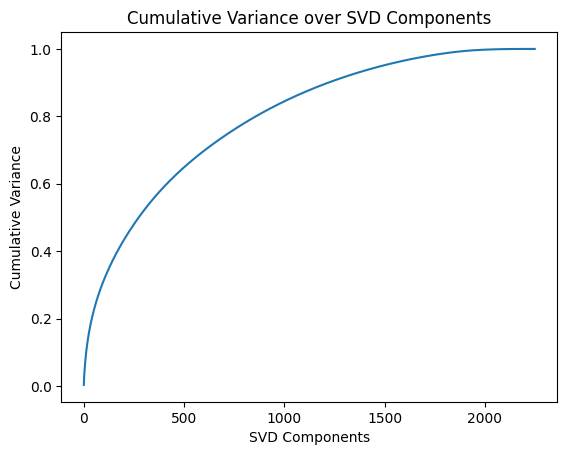

In [14]:
print_graph1 = False

if print_graph1:
    # SVD
    svd = TruncatedSVD(n_components=2500)
    x_svd = svd.fit_transform(x_train_vec)

    # setup to calculate cumulative variance
    cum_var = []
    tot_var = 0
    exp_var = svd.explained_variance_ratio_

    # loop through explained varaince, sum as we go along to figure out cumulative variance
    for ev in exp_var:
        tot_var += ev
        cum_var.append(tot_var)

    # Plot cumulative variance
    plt.plot(cum_var)
    plt.title('Cumulative Variance over SVD Components')
    plt.xlabel('SVD Components')
    plt.ylabel('Cumulative Variance')
    plt.show()


In [15]:
rand_st = 1    # Set random state for repeatability
n_com   = 1750 # Number of components to reduce to

# Convert to array
x_train_arr = x_train_vec.toarray()
x_test_arr = x_test_vec.toarray()

# reduce dimension with PCA
svd = TruncatedSVD(n_components=n_com, random_state=rand_st)
x_train_svd = svd.fit_transform(x_train_arr) 
x_test_svd = svd.transform(x_test_arr)

In [16]:
# use logistical regression
model = LogisticRegression()
model.fit(x_train_svd, y_train)

# predict and check accuracy
pred = model.predict(x_test_svd)
rep = classification_report(y_test, pred)

if debug:
    print(rep)
    print(model)

              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.83      1.00      0.91         5
           2       0.75      0.50      0.60         6
           3       0.40      0.67      0.50         3
           4       0.60      0.75      0.67         4
           5       1.00      0.71      0.83         7
           6       1.00      0.80      0.89         5
           7       0.50      0.50      0.50         2
           8       0.56      1.00      0.71         5
           9       1.00      0.40      0.57         5
          10       0.90      1.00      0.95         9
          11       0.88      0.88      0.88         8
          12       1.00      1.00      1.00         5
          13       0.70      1.00      0.82         7
          14       1.00      0.60      0.75         5
          15       1.00      1.00      1.00         6
          16       0.60      0.75      0.67         4
          17       0.75    

In [17]:
# Load in C50test located ../C50test/
test_dir = '../C50test'
# get name of directories, authors (these will be the labels)
test_sub = [name for name in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, name))]
test_lst = np.copy(train_sub)

if debug:
    print(test_dir)
    print(test_lst)

# setup the initial empty variables
test       = []
test_label = []

# load the input data from C50test directory and process it

auth_idx = 0

# go within the author directory to get list of the file names, this will be the training data
for i in train_sub:
    sub2_dir  = '../C50test/' + i 
    test_sub2 = [name for name in os.listdir(sub2_dir) if os.path.isfile(os.path.join(sub2_dir, name))]

    #if debug:
    #    print(sub2_dir)
    #    print(train_sub2)
        
    # in each author file, save the text as its test data
    for j in test_sub2:
        sub3  = '../C50test/' + i + '/' + j

        with open(sub3, 'r') as file:
            data = file.read()
            data_no_nw = data.replace('\n', '').replace('\r', '')
            test.append(data_no_nw)
        
        test_label.append(auth_idx)

    auth_idx = auth_idx + 1

if debug:
    print(np.shape(test))

../C50test
['AaronPressman' 'AlanCrosby' 'AlexanderSmith' 'BenjaminKangLim'
 'BernardHickey' 'BradDorfman' 'DarrenSchuettler' 'DavidLawder'
 'EdnaFernandes' 'EricAuchard' 'FumikoFujisaki' 'GrahamEarnshaw'
 'HeatherScoffield' 'JaneMacartney' 'JanLopatka' 'JimGilchrist' 'JoeOrtiz'
 'JohnMastrini' 'JonathanBirt' 'JoWinterbottom' 'KarlPenhaul' 'KeithWeir'
 'KevinDrawbaugh' 'KevinMorrison' 'KirstinRidley' 'KouroshKarimkhany'
 'LydiaZajc' "LynneO'Donnell" 'LynnleyBrowning' 'MarcelMichelson'
 'MarkBendeich' 'MartinWolk' 'MatthewBunce' 'MichaelConnor' 'MureDickie'
 'NickLouth' 'PatriciaCommins' 'PeterHumphrey' 'PierreTran' 'RobinSidel'
 'RogerFillion' 'SamuelPerry' 'SarahDavison' 'ScottHillis' 'SimonCowell'
 'TanEeLyn' 'TheresePoletti' 'TimFarrand' 'ToddNissen' 'WilliamKazer']
(2500,)


In [18]:
# transform
new_test_vec = vect.transform(test)

new_test_arr = new_test_vec.toarray()
new_test_svd = svd.transform(new_test_arr)

In [19]:

# predict with model
#new_pred = model.predict(new_test_vec)
new_pred = model.predict(new_test_svd)

# get report to print out accuracy
rep = classification_report(test_label, new_pred)

if debug:
    print(new_pred[0:999])
    print(rep)

[ 0  0 41  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 41  0  0
  5  0  1  1  1  1 17  1 14 17  1 21 17 17  1 14 14  1 14 14  1  1  1 17
  1 17 17  1 17 17 17 17 17 17  1  1  1  1 14  1 14  1  1 17 17 17 17  1
  1  1  1  1  2 16  2 16 16 16 16 16 16 16  2 16  2 16 16 16 16 16 16 16
 16 16  2 16 16 16 16  2 44  2 44  2 16 16  0  2 16  2 16 16 16 16 16 16
 16 18  2  2 16  2 13 37  3 49 11 27 11 49  3 13  3  3 43  3 37 43 13 13
 13  3 49 13 13  3 37  3  3 49 49 49 43 43 13 13 34 34 34 34 34 34 34 34
 34 13 49 34  3 49 43 43  4  4  4  4  4  4  4  4  4 23  4  5  5 23 23 30
 23  4 30 23 30 23 23 23  4  4  4  4  4 23  4 23  4  4 23 23 23 23 23  4
  4  4  4 23 23 23 23 23 23 30  5  5  5  5  5  5 41  5  5  5  5  9  5  5
 39 39  5 22  5  5  5  5 22  5  5  5  5  9  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5 35  5  5 22  5  5 12  6  6  6  6 12  6  6  6 12  6 12
  6 12 12 12 12 12 12 12  6 12 12 12 12 12 12 12  6